In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import StratifiedKFold

import imblearn

import warnings
warnings.filterwarnings("ignore")

# Which customers are likely to churn?
## What are the attributes that make you think so?

**The features:**

**customerID** - customer id
**gender**- client gender (male / female)
**SeniorCitizen** - is the client retired (1, 0)
**Partner** - is the client married (Yes, No)
**tenure** - how many months a person has been a client of the company
**PhoneService** - is the telephone service connected (Yes, No)
**MultipleLines** - are multiple phone lines connected (Yes, No, No phone service)
**InternetService** - client’s Internet service provider (DSL, Fiber optic, No)
**OnlineSecurity** - is the online security service connected (Yes, No, No internet service)
**OnlineBackup** - is the online backup service activated (Yes, No, No internet service)
**DeviceProtection** - does the client have equipment insurance (Yes, No, No internet service)
**TechSupport** - is the technical support service connected (Yes, No, No internet service)
**StreamingTV** - is the streaming TV service connected (Yes, No, No internet service)
**StreamingMovies** - is the streaming cinema service activated (Yes, No, No internet service)
**Contract** - type of customer contract (Month-to-month, One year, Two year)
**PaperlessBilling** - whether the client uses paperless billing (Yes, No)
**PaymentMethod** - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
**MonthlyCharges** - current monthly payment
**TotalCharges** - the total amount that the client paid for the services for the entire time
**Churn** - whether there was a churn (Yes or No)

In [41]:
df = pd.read_csv("../Data/telecom_users.csv")
print(f'Telecom Users Dataset -> shape: {df.shape}')

Telecom Users Dataset -> shape: (5986, 22)


In [42]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [44]:
print(f"Number of features: {len(df.columns)}")
print(f"Number of observations: {len(df)}")

Number of features: 22
Number of observations: 5986


In [45]:
df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### The dataset doesn't contain any missing values.

In [46]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [47]:
df.describe(include="all")

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,5986.000000,5986,5986,5986.000000,5986,5986,5986.000000,5986,5986,5986,...,5986,5986,5986,5986,5986,5986,5986,5986.000000,5986,5986
unique,NaN,5986,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,5611,2
top,NaN,7010-BRBUU,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,NaN,1,3050,NaN,3082,4195,NaN,5396,2848,2627,...,2640,2960,2389,2356,3269,3528,2006,NaN,10,4399
mean,3533.561310,NaN,NaN,0.161377,NaN,NaN,32.468760,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.802213,NaN,NaN
std,2035.705666,NaN,NaN,0.367909,NaN,NaN,24.516391,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.114702,NaN,NaN
min,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,1777.250000,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.650000,NaN,NaN
50%,3546.500000,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,NaN,NaN
75%,5291.750000,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.900000,NaN,NaN


In [48]:
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

customerID - # unique values: 5986
gender - # unique values: 2
Partner - # unique values: 2
Dependents - # unique values: 2
PhoneService - # unique values: 2
MultipleLines - # unique values: 3
InternetService - # unique values: 3
OnlineSecurity - # unique values: 3
OnlineBackup - # unique values: 3
DeviceProtection - # unique values: 3
TechSupport - # unique values: 3
StreamingTV - # unique values: 3
StreamingMovies - # unique values: 3
Contract - # unique values: 3
PaperlessBilling - # unique values: 2
PaymentMethod - # unique values: 4
TotalCharges - # unique values: 5611
Churn - # unique values: 2


In [49]:
df["customerID"].value_counts()

7010-BRBUU    1
6303-KFWSL    1
5692-ICXLW    1
5561-NWEVX    1
3392-EHMNK    1
             ..
5010-IPEAQ    1
2650-GYRYL    1
5233-GEEAX    1
1573-LGXBA    1
4795-UXVCJ    1
Name: customerID, Length: 5986, dtype: int64

## Dataset cleaning

After analysing the dataset, it makes sense to drop:
Unnamed: 0
customerID -> Unique for each customer. Doesn't add valuable information
TotalCharges -> This column is the multiplication of MonthlyCharges and tenure


In [50]:
df = df.drop(["Unnamed: 0", "customerID", "TotalCharges"], axis = 1)

In [51]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,No


In [52]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

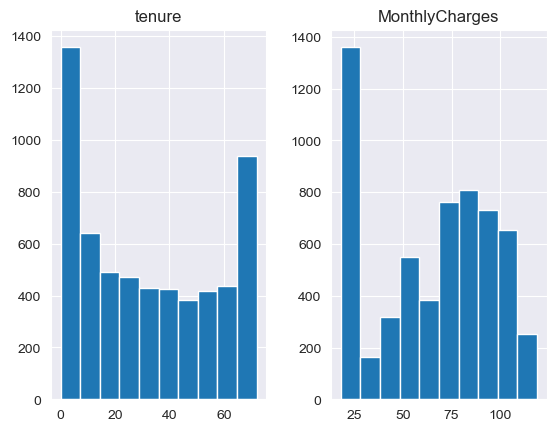

In [53]:
df.hist();

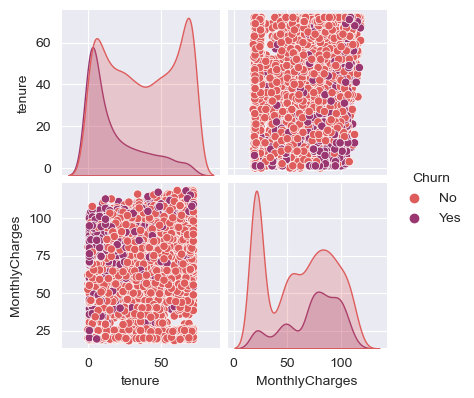

In [54]:
sns.pairplot(df, hue="Churn",palette='flare',height=2);

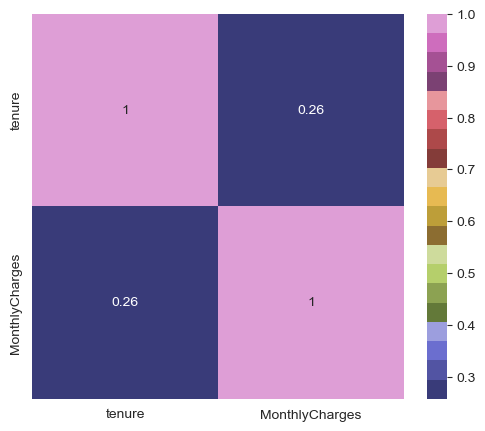

In [55]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap= "tab20b")
plt.show()

In [56]:
palette = sns.color_palette("deep")

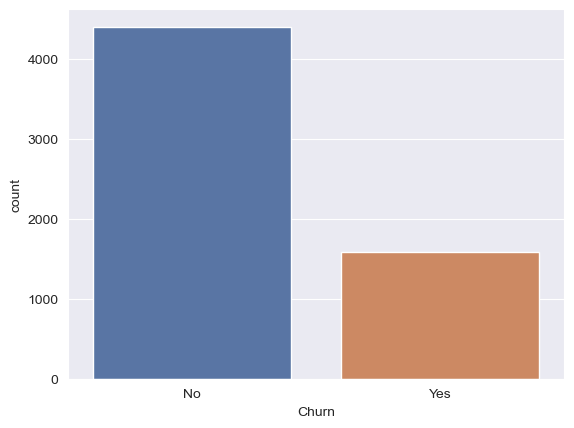

In [57]:
sns.countplot("Churn", data=df, palette = palette)
plt.savefig('Churn.png');

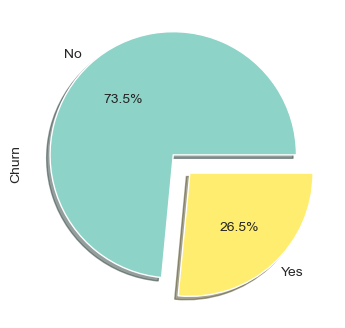

In [58]:
df["Churn"].value_counts().plot.pie(explode=[0.1,0.1], autopct = "%1.1f%%", cmap = "Set3", shadow = True, figsize = (6, 4))
plt.savefig('PieChart_Churn.png');

### Imbalanced Distribution


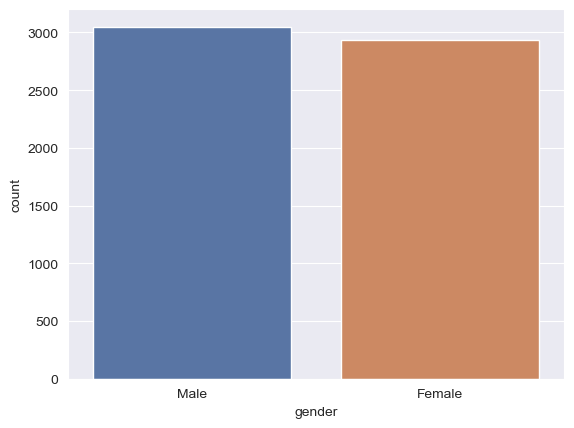

In [59]:
sns.countplot("gender", data=df,palette = palette)
plt.savefig('Gender.png');

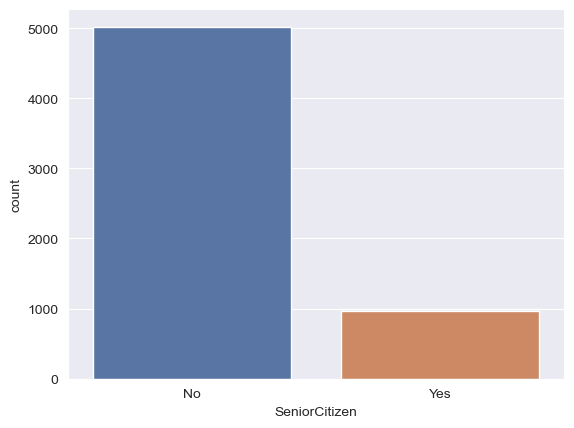

In [60]:
sns.countplot("SeniorCitizen", data=df, palette = palette)
plt.savefig('SeniorCitizen.png');

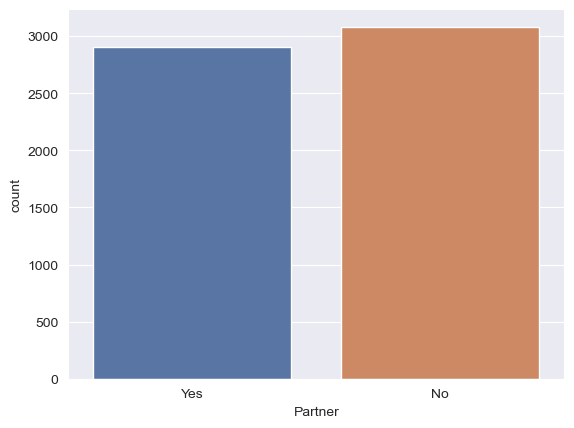

In [61]:
sns.countplot("Partner", data=df, palette = palette)
plt.savefig('Partner.png');

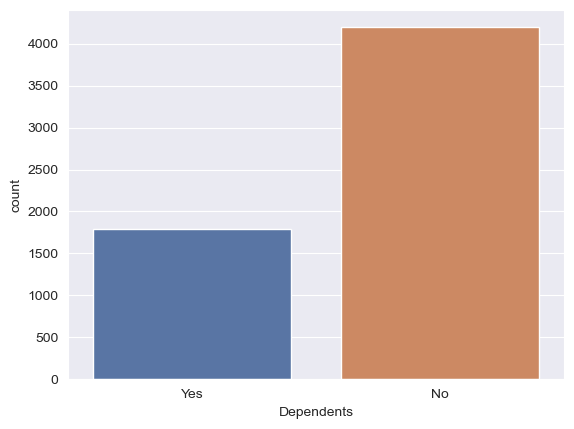

In [62]:
sns.countplot("Dependents", data=df, palette = palette)
plt.savefig('Dependents.png');

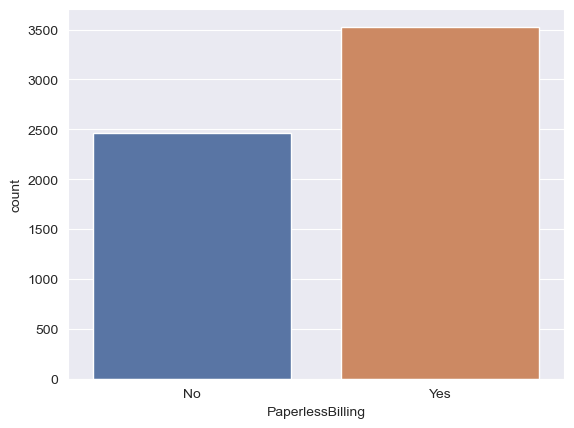

In [63]:
sns.countplot("PaperlessBilling", data=df, palette = palette)
plt.savefig('PaperlessBilling.png');

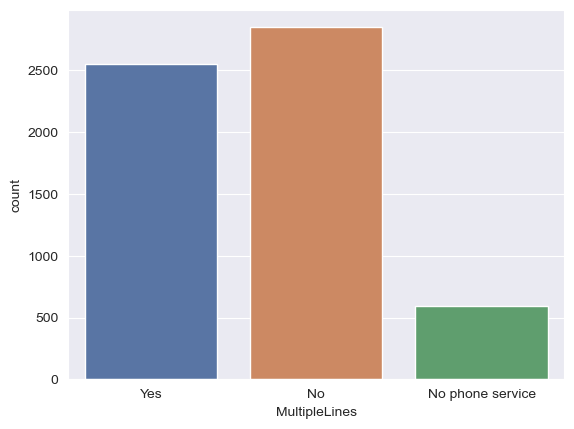

In [64]:
sns.countplot("MultipleLines", data=df, palette = palette)
plt.savefig('MultipleLines.png');

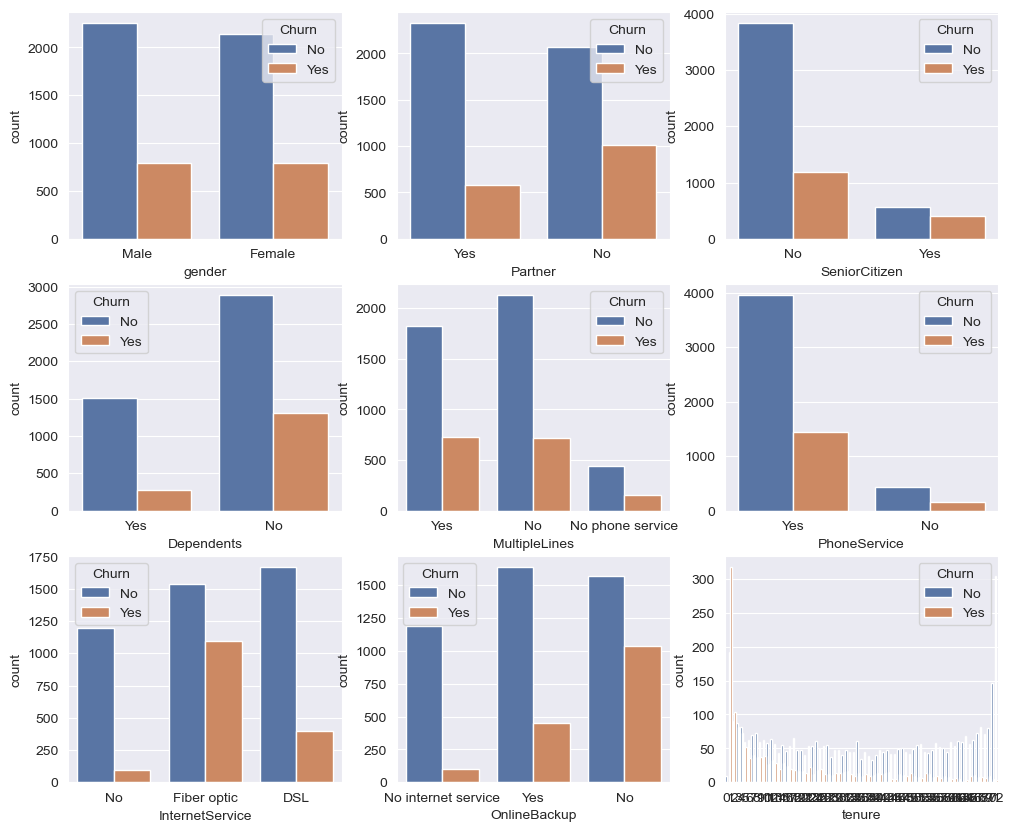

In [65]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 10))
sns.countplot("gender", hue = "Churn", data = df, ax = ax[0,0], palette = palette)
sns.countplot("Partner", hue = "Churn", data = df, ax = ax[0,1], palette = palette)
sns.countplot("SeniorCitizen", hue = "Churn", data = df, ax = ax[0,2], palette = palette)
sns.countplot("Dependents", hue = "Churn", data = df, ax = ax[1,0], palette = palette)
sns.countplot("MultipleLines", hue = "Churn", data = df, ax = ax[1,1], palette = palette)
sns.countplot("PhoneService", hue = "Churn", data = df, ax = ax[1,2], palette = palette)
sns.countplot("InternetService", hue = "Churn", data = df, ax = ax[2,0], palette = palette)
sns.countplot("OnlineBackup", hue = "Churn", data = df, ax = ax[2,1], palette = palette)
sns.countplot("tenure", hue = "Churn", data = df, ax = ax[2,2], palette = palette)

plt.savefig('Churn_v_features.png');

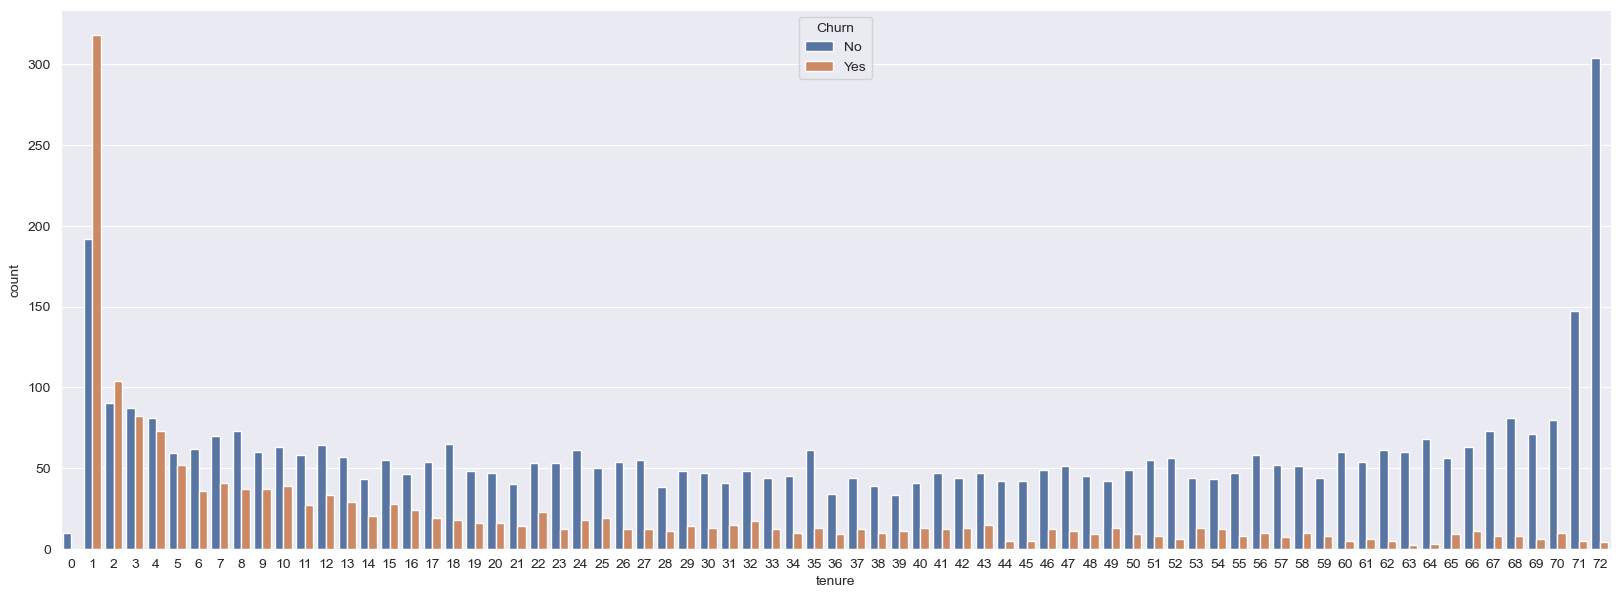

In [66]:
ax = plt.subplots(figsize = (20, 7))
ax = sns.countplot("tenure", hue = "Churn", data = df, palette = palette)
plt.savefig('Churn_v_Tenure.png');

In [67]:
df.groupby(["tenure", "Churn"]).size().unstack(fill_value=0)

Churn,No,Yes
tenure,,
0,10,0
1,192,318
2,90,104
3,87,82
4,81,73
...,...,...
68,81,8
69,71,6
70,80,10


In [68]:
df.to_csv('../Data/telecom_users_eda.csv',index=False)